In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
inputDir = "/home/onimem/work/Open_world/NBA/EDA"
outputDir = "/home/onimem/work/Open_world/NBA/Graph/multiattribute"

from subprocess import check_output
print(check_output(["ls", inputDir]).decode("utf8"))

EDA.csv
Players.csv
Seasons_Stats.csv
player_data.csv



In [2]:
# EDA.csv
players=pd.read_csv(inputDir + '/EDA.csv')
players.drop('Unnamed: 0', axis=1, inplace=True)
print(players.shape)
players.head()

(20085, 17)


,Year,Player,Pos,Tm,G,FG,FGA,2P,2PA,FT,FTA,AST,PF,PTS,height,weight,Age
0,1950.0,Curly Armstrong,G-F,DET,63.0,144.0,516.0,144.0,516.0,170.0,241.0,176.0,217.0,458.0,180.0,77.0,31.0
1,1951.0,Curly Armstrong,G-F,DET,38.0,72.0,232.0,72.0,232.0,58.0,90.0,77.0,97.0,202.0,180.0,77.0,32.0
2,1950.0,Ed Bartels,F,NYK,2.0,1.0,4.0,1.0,4.0,2.0,3.0,0.0,2.0,4.0,196.0,88.0,24.0
3,1950.0,Gene Berce,G-F,ATL,3.0,5.0,16.0,5.0,16.0,0.0,5.0,2.0,6.0,10.0,180.0,79.0,23.0
4,1950.0,Charlie Black,F-C,DET,36.0,125.0,435.0,125.0,435.0,132.0,209.0,75.0,140.0,382.0,196.0,90.0,28.0


In [3]:
seasons = players.sort_values(by='Year').copy()
print(seasons.shape)
seasons.head()

(20085, 17)


,Year,Player,Pos,Tm,G,FG,FGA,2P,2PA,FT,FTA,AST,PF,PTS,height,weight,Age
0,1950.0,Curly Armstrong,G-F,DET,63.0,144.0,516.0,144.0,516.0,170.0,241.0,176.0,217.0,458.0,180.0,77.0,31.0
146,1950.0,Bob Harrison,G,LAL,66.0,125.0,348.0,125.0,348.0,50.0,74.0,131.0,175.0,300.0,201.0,88.0,22.0
154,1950.0,Billy Hassett,G,LAL,42.0,38.0,145.0,38.0,145.0,35.0,67.0,69.0,82.0,111.0,180.0,81.0,28.0
155,1950.0,Bill Henry,C,ATL,19.0,24.0,69.0,24.0,69.0,34.0,51.0,9.0,23.0,82.0,206.0,97.0,25.0
385,1950.0,Paul Seymour,G-F,PHI,62.0,175.0,524.0,175.0,524.0,126.0,176.0,189.0,157.0,476.0,185.0,81.0,21.0


In [4]:
years = [i for i in range(1950, 2018)]
num_player = seasons.groupby('Year').count()['Player']
history = {"year":years, "player":num_player}

In [5]:
def plot_history(history):

    plt.plot(history['year'], history['player'], marker=".")
    plt.xlabel('year')
    plt.ylabel('player')
    plt.show()

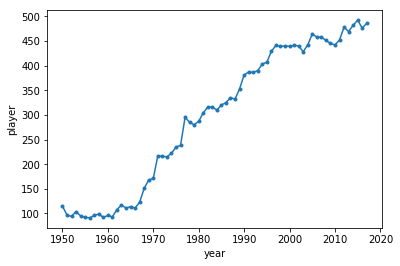

In [6]:
plot_history(history)

In [7]:
seasons_year = {}
for year in years:
    seasons_year[year] = seasons.query('Year == ' + str(year))

In [8]:
attribute = list(set(list(seasons_year[1950])) - set(['Year', 'Player']))

graph = {}
for year in years:
    graph[year] = {}
    graph[year]['nodes'] = {}
    graph[year]['edges'] = {}
    for name in seasons_year[year]['Player']:
        graph[year]['nodes'][name] = {}
        for att in attribute:
            graph[year]['nodes'][name][att] = list(seasons_year[year].query('Player == "' + name + '"')[att])[0]
    
    graph[year]['edges']['team'] = []
    sameteam = []
    for name1 in seasons_year[year]['Player']:
        tm1 = list(seasons_year[year].query('Player == "' + name1 + '"')['Tm'])[0]
        for name2 in seasons_year[year]['Player']:
            if name1 == name2:
                continue
            tm2 = list(seasons_year[year].query('Player == "' + name2 + '"')['Tm'])[0]
            if tm1 == tm2 and (name1, name2) not in sameteam:
                sameteam.append((name1, name2))
    graph[year]['edges']['team'].extend(sameteam)
    print(year)

with open(outputDir + '/nba.graph', 'wb') as f:
    pickle.dump(graph, f)

1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
